In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

In [2]:
data = pd.read_csv('master.csv')

In [3]:
data

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


In [4]:
round(100*(data.isnull().sum()/len(data.index)),2)

country                0.00
year                   0.00
sex                    0.00
age                    0.00
suicides_no            0.00
population             0.00
suicides/100k pop      0.00
country-year           0.00
HDI for year          69.94
 gdp_for_year ($)      0.00
gdp_per_capita ($)     0.00
generation             0.00
dtype: float64

In [5]:
#lets remove the column "HDI for year" as it has 69% of data missing
data = data.drop(['HDI for year'],axis = 1)

In [6]:
data = data.drop(['country-year'],axis = 1)

In [7]:
data

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,"63,067,077,179",2309,Generation Z


In [8]:
data['generation']

0           Generation X
1                 Silent
2           Generation X
3        G.I. Generation
4                Boomers
              ...       
27815       Generation X
27816             Silent
27817       Generation Z
27818       Generation Z
27819            Boomers
Name: generation, Length: 27820, dtype: object

In [9]:
data.shape

(27820, 10)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 10 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(1), int64(4), object(5)
memory usage: 2.1+ MB


In [11]:
data.tail()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,"63,067,077,179",2309,Generation Z
27819,Uzbekistan,2014,female,55-74 years,21,1438935,1.46,"63,067,077,179",2309,Boomers


# Let's evaluate each columns one by one

In [12]:
data['generation'].value_counts()

Generation X       6408
Silent             6364
Millenials         5844
Boomers            4990
G.I. Generation    2744
Generation Z       1470
Name: generation, dtype: int64

In [13]:
data['country'].unique()

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Republic of Korea', 'Romania', '

In [14]:
data['year'].unique()

array([1987, 1988, 1989, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       1985, 1986, 1990, 1991, 2012, 2013, 2014, 2015, 2011, 2016])

## Data Visualisation:-

### To find valuable information

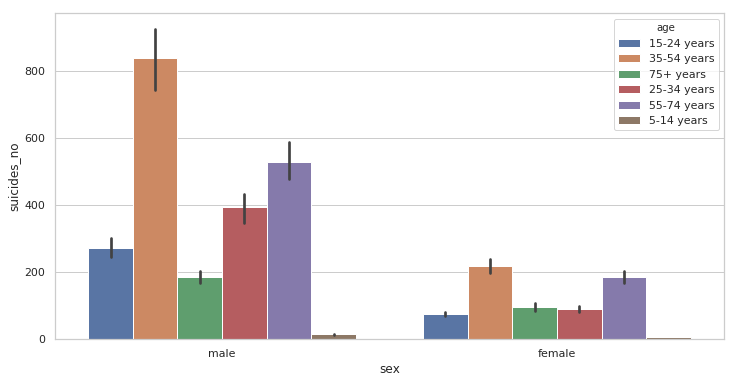

female    13910
male      13910
Name: sex, dtype: int64

In [15]:
plt.figure(figsize=(12,6))
bar_age = sns.barplot(x = 'sex', y = 'suicides_no', hue = 'age',data = data)
plt.show()
data['sex'].value_counts()

## Observation
1. We find that the number of deaths of *male* is much higher than *female*.
2. **35-54 years** have commited more suicides than any other age group.
3. **Male** and **Female** within the 5-14 years are not likely to commit suicides.


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

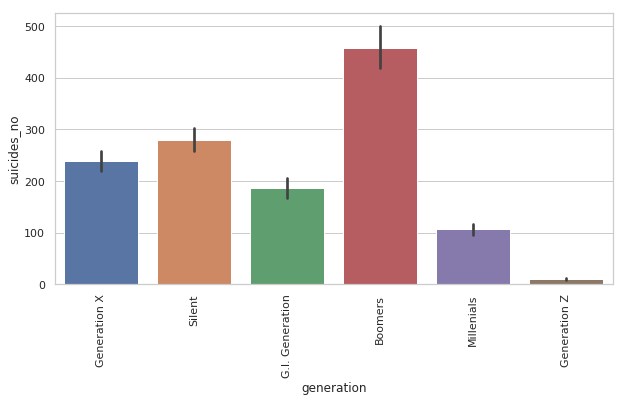

In [16]:
plt.figure(figsize=(10,5))

bar_age = sns.barplot(x = 'generation', y = 'suicides_no',data = data)
plt.xticks(rotation = 90)

## Observation

- Generations **Boomers** have *highest* suicide number than others.
- **Generation Z** has the *lowest* suicide number.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 <a list of 32 Text xticklabel objects>)

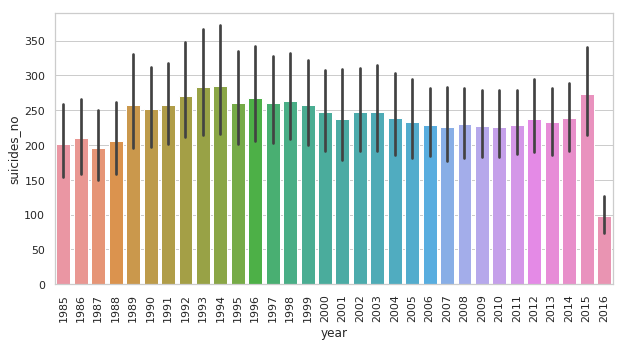

In [17]:
plt.figure(figsize=(10,5))
sns.barplot(x= 'year', y ='suicides_no', data= data)
plt.xticks(rotation = 90)

## Observation:

- The maximum nuber of suicides took in **1994**
- There was a sudden decline in the number of deaths in 2016
 

In [18]:
#function to help us keep count of number of countries with their index value for plotting graph

def cnum(country1):
    D = pd.DataFrame(data['country']==country1)
    D1 = D[D['country']==True]
    return D1

In [19]:
cnum('Canada')

,country
4916,True
4917,True
4918,True
4919,True
4920,True
...,...
5259,True
5260,True
5261,True
5262,True


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text yticklabel objects>)

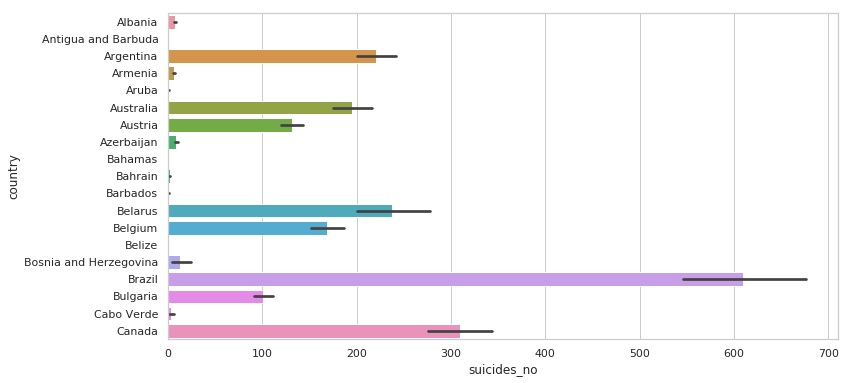

In [20]:
plt.figure(figsize=(12,6))

#plt.subplot(4,1,1)
sns.barplot(y=data['country'][0:5263], x= data['suicides_no'])
plt.yticks(rotation = 0)



## Observation

- From the first graph (having 19 countries) the **highest suicide numbers is seen in Brazil**

In [21]:
cnum('Germany')

,country
9710,True
9711,True
9712,True
9713,True
9714,True
...,...
10017,True
10018,True
10019,True
10020,True


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text yticklabel objects>)

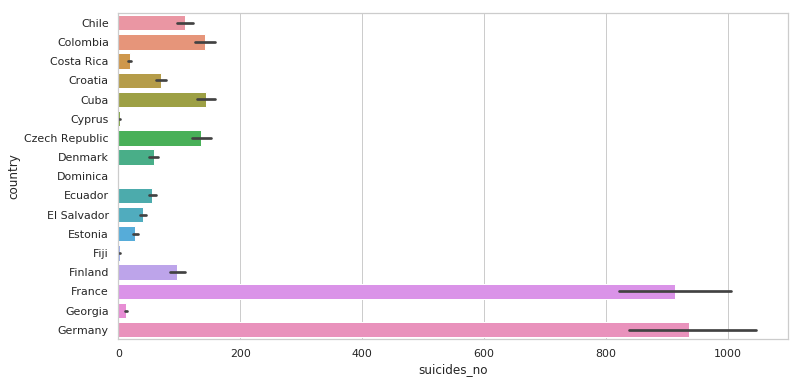

In [22]:
#plt.subplot(4,1,2)
plt.figure(figsize=(12,6))

sns.barplot(y=data['country'][5264:10021], x= data['suicides_no'])
plt.yticks(rotation = 0)


## Observation

- From the second graph (having 17 countries) the **highest suicide numbers is seen in Germany and France**, this number exceeds **Brazil** from the previous plot

In [23]:
cnum('Latvia')

,country
14792,True
14793,True
14794,True
14795,True
14796,True
...,...
15039,True
15040,True
15041,True
15042,True


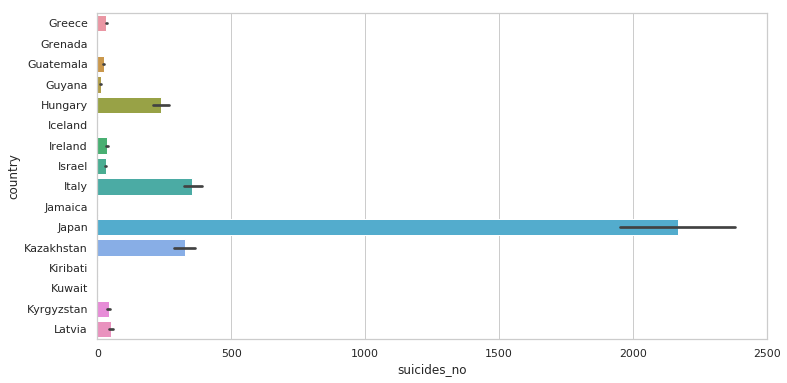

In [24]:
#plt.subplot(4,1,3)
plt.figure(figsize=(12,6))

sns.barplot(y=data['country'][10022:15043], x= data['suicides_no'])
#plt.xticks(rotation = 90)

## Observation

- **Japan** shows the **higest number of suicides** exceeding the value more than 2200

In [25]:
cnum('Puerto Rico')

,country
19680,True
19681,True
19682,True
19683,True
19684,True
...,...
20047,True
20048,True
20049,True
20050,True


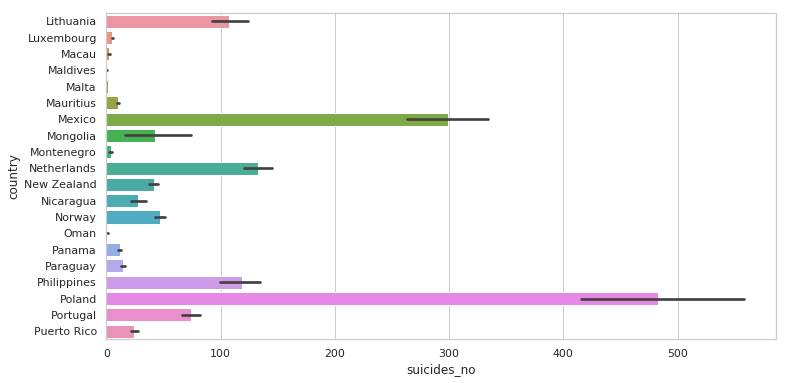

In [26]:
#plt.subplot(4,1,4)
plt.figure(figsize=(12,6))

sns.barplot(y=data['country'][15044:20051], x= data['suicides_no'])



## Observation

- This graph shows a comparative lesser number of suicides compared to the other graphs we drew before, with **Portugal** as the highest with 480 suicides and **Mexico** close to 300.


In [27]:
cnum('Thailand')

,country
24978,True
24979,True
24980,True
24981,True
24982,True
...,...
25307,True
25308,True
25309,True
25310,True


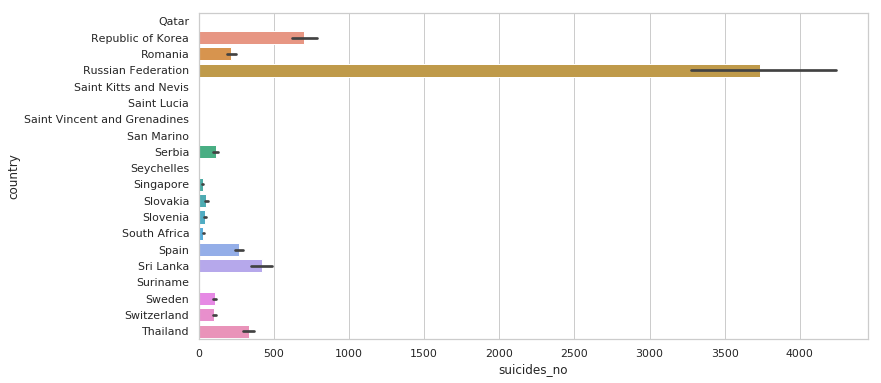

In [28]:
#plt.subplot(4,1,4)
plt.figure(figsize=(12,6))

sns.barplot(y=data['country'][20052:25311], x= data['suicides_no'])



## Observation 

- This graphs shows that **Russian Federation** has the highest number of suicides with more than **3800 suicides** over the period.
- We also see that **Republic of Korea has around 700 suicides.**

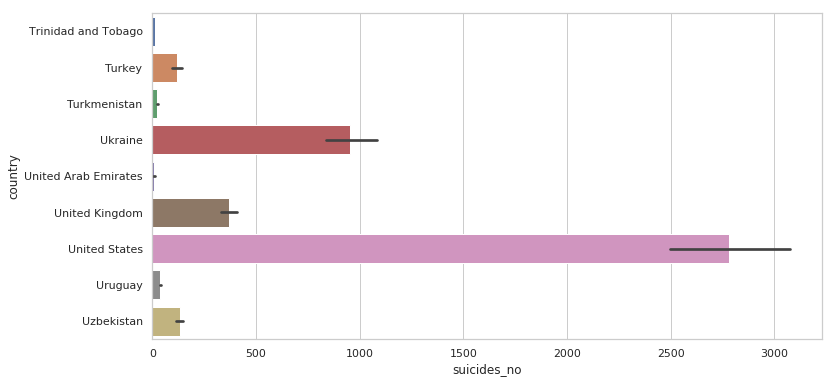

In [29]:
#plt.subplot(4,1,4)
plt.figure(figsize=(12,6))

sns.barplot(y=data['country'][25312:27820], x= data['suicides_no'])



## Observation

- We see that United States has around 2700 suicide cases over the period of **1987 - 2016**

In [43]:
data

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,"63,067,077,179",2309,Generation Z


In [47]:
data = data.rename({'gdp_per_capita ($)':'gdp'},axis = 1)

In [58]:
data['gdp'].nunique()

2233

In [59]:
data['gdp'].describe()

count     27820.000000
mean      16866.464414
std       18887.576472
min         251.000000
25%        3447.000000
50%        9372.000000
75%       24874.000000
max      126352.000000
Name: gdp, dtype: float64

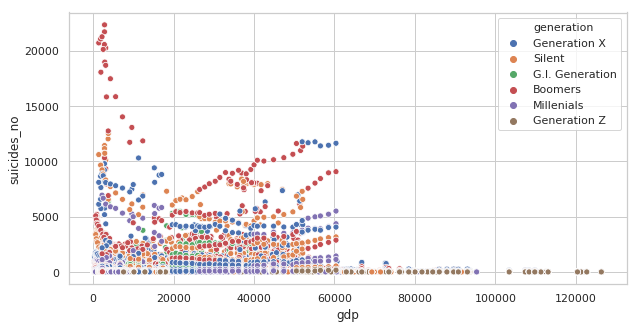

In [72]:
plt.figure(figsize=(10,5))

sns.scatterplot(x=data['gdp'], y = data['suicides_no'],hue = data['generation'])
#plt.xticks(rotation = 90)

## Observation

- We find that maximum suicides have occured where the countries GDP was less than 6000
- **Maximum suicides** occured for countries having **GDP range within 2000.**
- Countries having **higher GDPs** have encountered **less suicides**.